In [1]:
import h5py
import numpy as np

def data_loader_DATA(file_to_load):
    

    # Loads the .hdf5 file
    hf = h5py.File(file_to_load,'r')
    

    # Cria lista para armarezar as variáveis
    X_train = []
    Y_train = []
    X_val = []
    Y_val = []
    X_test = []
    Y_test = []
    Classes_sort = []
    Rcr_classes = []

    # Extrai as variáveis 
    
    X_train.append(np.array(hf.get('Xtrain').get('Xtrain')))
    Y_train.append(np.array(hf.get('Ytrain').get('Ytrain')))
    X_val.append(np.array(hf.get('Xval').get('Xval')))
    Y_val.append(np.array(hf.get('Yval').get('Yval')))
    X_test.append(np.array(hf.get('Xtest').get('Xtest')))
    Y_test.append(np.array(hf.get('Ytest').get('Ytest')))
    Classes_sort.append(np.array(hf.get('Classessort').get('Classessort')))
    Rcr_classes.append(np.array(hf.get('Rcr').get('Rcr')))



    # Saves in a dictionary
    data = {    
           "X_train": X_train,
           "Y_train": Y_train,
           "X_val": X_val,
           "Y_val": Y_val,
           "X_test": X_test,
           "Y_test": Y_test,
           "Classes_sort": Classes_sort,
           "Rcr_classes": Rcr_classes
    }
    
    
    hf.close()
    return data

In [2]:
whole_data_test = []
file_to_load = 'h5/Data_extended_ballroom.hdf5'
data = data_loader_DATA(file_to_load)
whole_data_test.append(data)
print('X_train Size',whole_data_test[0]['X_train'][0].shape)
print('Y_train Size',whole_data_test[0]['Y_train'][0].shape)
print('X_val Size',whole_data_test[0]['X_val'][0].shape)
print('Y_val Size',whole_data_test[0]['Y_val'][0].shape)
print('X_test Size',whole_data_test[0]['X_test'][0].shape)
print('Y_test Size',whole_data_test[0]['Y_test'][0].shape)
print('Classes_sort Size',whole_data_test[0]['Classes_sort'][0].shape)
print('Rcr_classes',whole_data_test[0]['Rcr_classes'][0].shape)



X_train = whole_data_test[0]['X_train'][0]
Y_train = whole_data_test[0]['Y_train'][0]
X_val = whole_data_test[0]['X_val'][0]
Y_val = whole_data_test[0]['Y_val'][0]
X_test = whole_data_test[0]['X_test'][0]
Y_test = whole_data_test[0]['Y_test'][0]
Classes_sort = whole_data_test[0]['Classes_sort'][0]
Rcr_classes = whole_data_test[0]['Rcr_classes'][0]

X_train Size (3653, 17, 18, 3)
Y_train Size (3653, 85)
X_val Size (427, 17, 18, 3)
Y_val Size (427, 85)
X_test Size (100, 17, 18, 3)
Y_test Size (100, 85)
Classes_sort Size (85, 1)
Rcr_classes (85,)


In [3]:
import numpy as np
import time

import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout, AvgPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd



Using TensorFlow backend.


In [4]:
model = Sequential()
model.add(Conv2D(input_shape=(17,18,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=1024,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(units=1024,activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(units=85, activation="softmax"))

In [5]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
#model.compile(optimizer='Adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=opt, loss=keras.losses.binary_crossentropy, metrics=['categorical_accuracy','accuracy'])

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 17, 18, 64)        1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 18, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 9, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 9, 128)         73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 9, 128)         147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

In [7]:
epochs= 20
batch_size=32
start = time.time()
H = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_val, Y_val))
#H = model.fit(X_train, Y_train, batch_size=32, epochs=epochs)

end = time.time()
print(f"O tempo de execução foi de aproximadamente {round((end - start)/60)} minutos")

Train on 3653 samples, validate on 427 samples
Epoch 1/20
3653/3653 [==============================] - 18s 5ms/step - loss: 3.0283 - accuracy: 0.1719 - val_loss: 2.5463 - val_accuracy: 0.2693
Epoch 2/20
3653/3653 [==============================] - 17s 5ms/step - loss: 2.1102 - accuracy: 0.4229 - val_loss: 1.7103 - val_accuracy: 0.5340
Epoch 3/20
3653/3653 [==============================] - 18s 5ms/step - loss: 1.5170 - accuracy: 0.6228 - val_loss: 1.5477 - val_accuracy: 0.6112
Epoch 4/20
3653/3653 [==============================] - 17s 5ms/step - loss: 1.2096 - accuracy: 0.6898 - val_loss: 1.2119 - val_accuracy: 0.7237
Epoch 5/20
3653/3653 [==============================] - 17s 5ms/step - loss: 1.0492 - accuracy: 0.7178 - val_loss: 1.1922 - val_accuracy: 0.7166
Epoch 6/20
3653/3653 [==============================] - 17s 5ms/step - loss: 0.9185 - accuracy: 0.7586 - val_loss: 1.1240 - val_accuracy: 0.7377
Epoch 7/20
3653/3653 [==============================] - 17s 5ms/step - loss: 0.8148

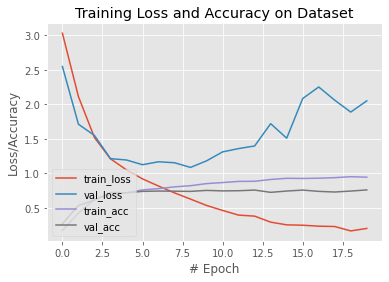

In [8]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("# Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig("plot.png")

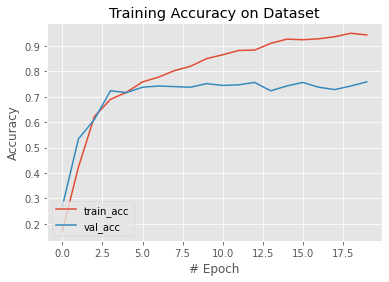

In [9]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Accuracy on Dataset")
plt.xlabel("# Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
#plt.savefig("plot.png")

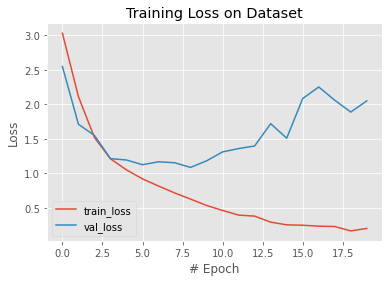

In [10]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.title("Training Loss on Dataset")
plt.xlabel("# Epoch")
plt.ylabel("Loss")
plt.legend(loc="lower left")
#plt.savefig("plot.png")

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


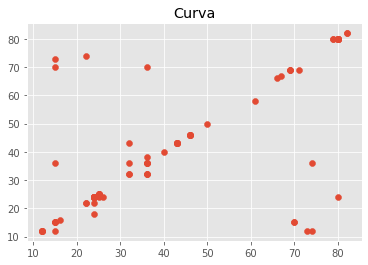

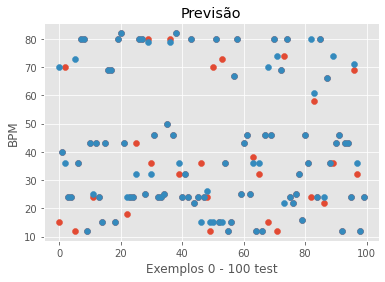

In [11]:
Auxtest = [list(range(0,len(Y_test)))]
Auxtest = np.array(Auxtest).reshape(len(Y_test))
y_predtestlist = []
y_testlist = []
y_predtest = model.predict(X_test)
for i in range (0,len(y_predtest)):
    y_predtest[i] = (y_predtest[i] == np.max(y_predtest[i]))
    aux = 0 
    for j in range(0,85):
        aux = aux + 1
        if (y_predtest[i][j]==1):
            y_predtestlist.append(aux)
        if (Y_test[i][j]==1):
            y_testlist.append(aux)
#y_predtest = (y_predtest > 0.5)
print(y_predtest[1])
print(Y_test[1])
plt.scatter(y_testlist,y_predtestlist)
plt.title('Curva')
plt.show()
plt.scatter(Auxtest,y_predtestlist)
plt.scatter(Auxtest,y_testlist)
plt.xlabel('Exemplos 0 - 100 test')
plt.ylabel('BPM')
plt.title('Previsão')
plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


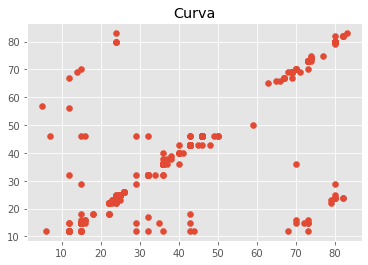

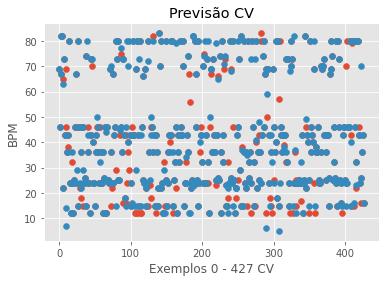

In [12]:
Auxval = [list(range(0,len(Y_val)))]
Auxval = np.array(Auxval).reshape(len(Y_val))
y_predvallist = []
y_vallist = []
y_predval = model.predict(X_val)
for i in range (0,len(y_predval)):
    y_predval[i] = (y_predval[i] == np.max(y_predval[i]))
    aux = 0
    for j in range(0,85):
        aux = aux + 1
        if (y_predval[i][j]==1):
            y_predvallist.append(aux)
        if (Y_val[i][j]==1):
            y_vallist.append(aux)
#y_predval = (y_predval > 0.5)
print(y_predval[1])
print(Y_val[1])
plt.scatter(y_vallist,y_predvallist)
plt.title('Curva')
plt.show()
plt.scatter(Auxval,y_predvallist)
plt.scatter(Auxval,y_vallist)
plt.xlabel('Exemplos 0 - 427 CV')
plt.ylabel('BPM')
plt.title('Previsão CV')
plt.show()

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


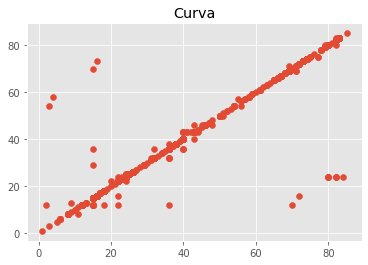

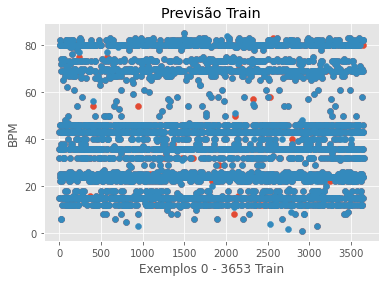

In [13]:
Auxtrain = [list(range(0,len(Y_train)))]
Auxtrain = np.array(Auxtrain).reshape(len(Y_train))
y_predtrainlist = []
y_trainlist = []
y_predtrain = model.predict(X_train)
for i in range (0,len(y_predtrain)):
    y_predtrain[i] = (y_predtrain[i] == np.max(y_predtrain[i]))
    aux = 0 
    for j in range(0,85):
        aux = aux + 1
        if (y_predtrain[i][j]==1):
            y_predtrainlist.append(aux)
        if (Y_train[i][j]==1):
            y_trainlist.append(aux)
#y_predtrain = (y_predtrain > 0.5)
#print(len(y_predtrain))
print(y_predtrain[1])
print(Y_train[1])
plt.scatter(y_trainlist,y_predtrainlist)
plt.title('Curva')
plt.show()
plt.scatter(Auxtrain,y_predtrainlist)
plt.scatter(Auxtrain,y_trainlist)
plt.xlabel('Exemplos 0 - 3653 Train')
plt.ylabel('BPM')
plt.title('Previsão Train')
plt.show()

In [14]:
cmval = confusion_matrix(Y_val[1], y_predval[1])

print(cmval, Y_val[0]) 

[[84  0]
 [ 0  1]] [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


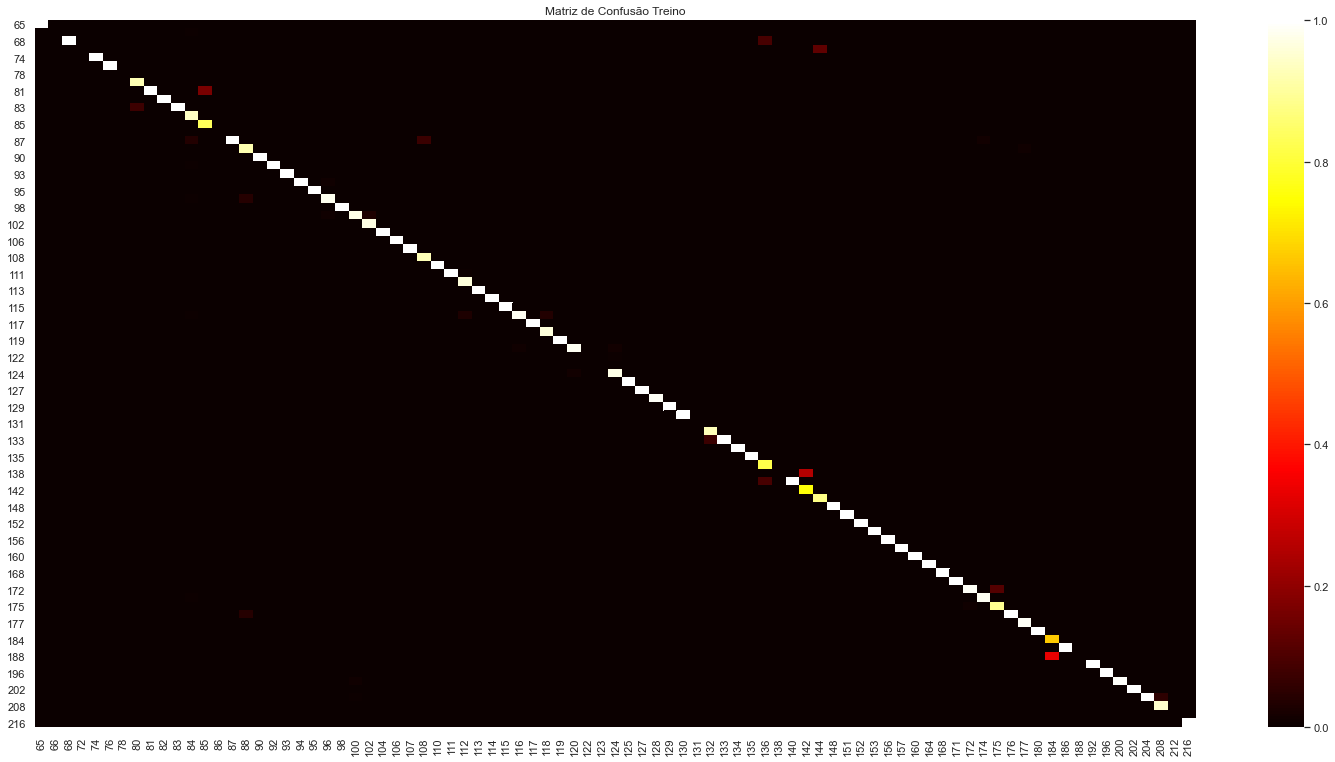

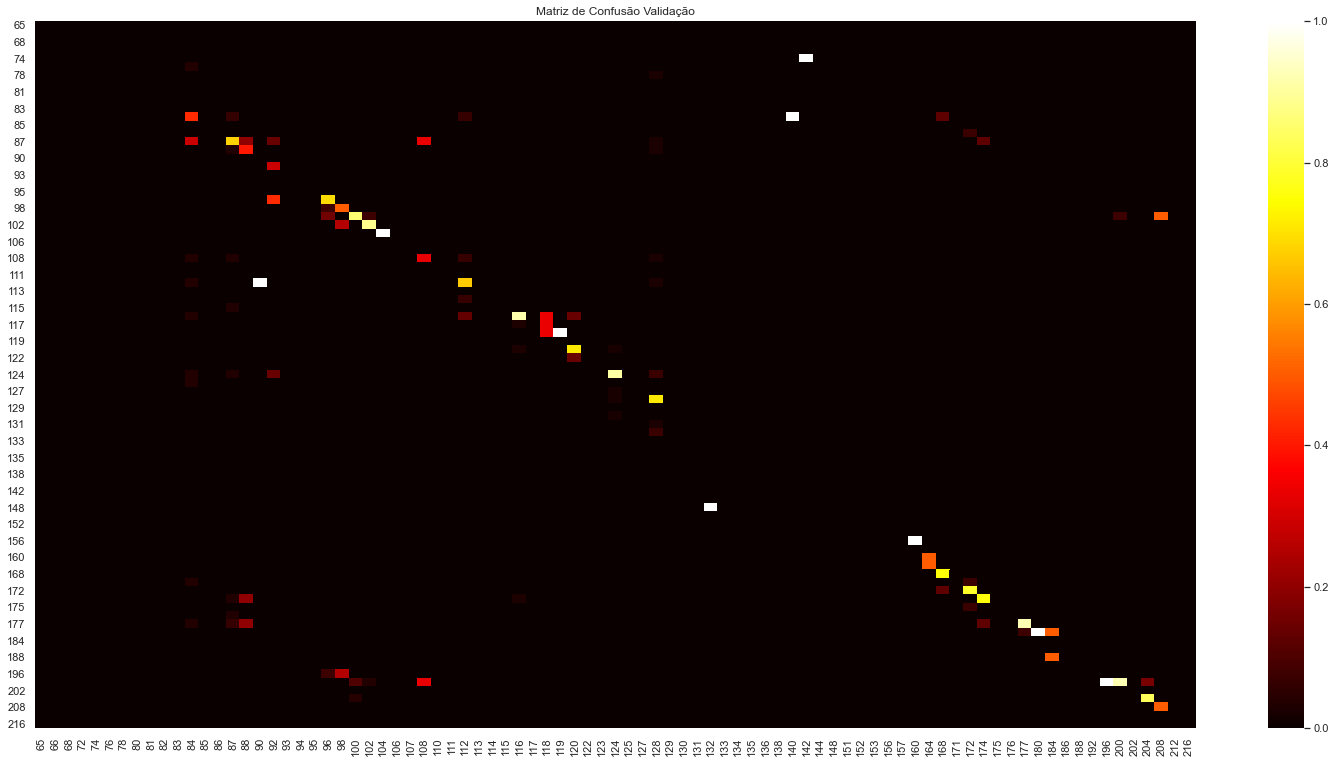

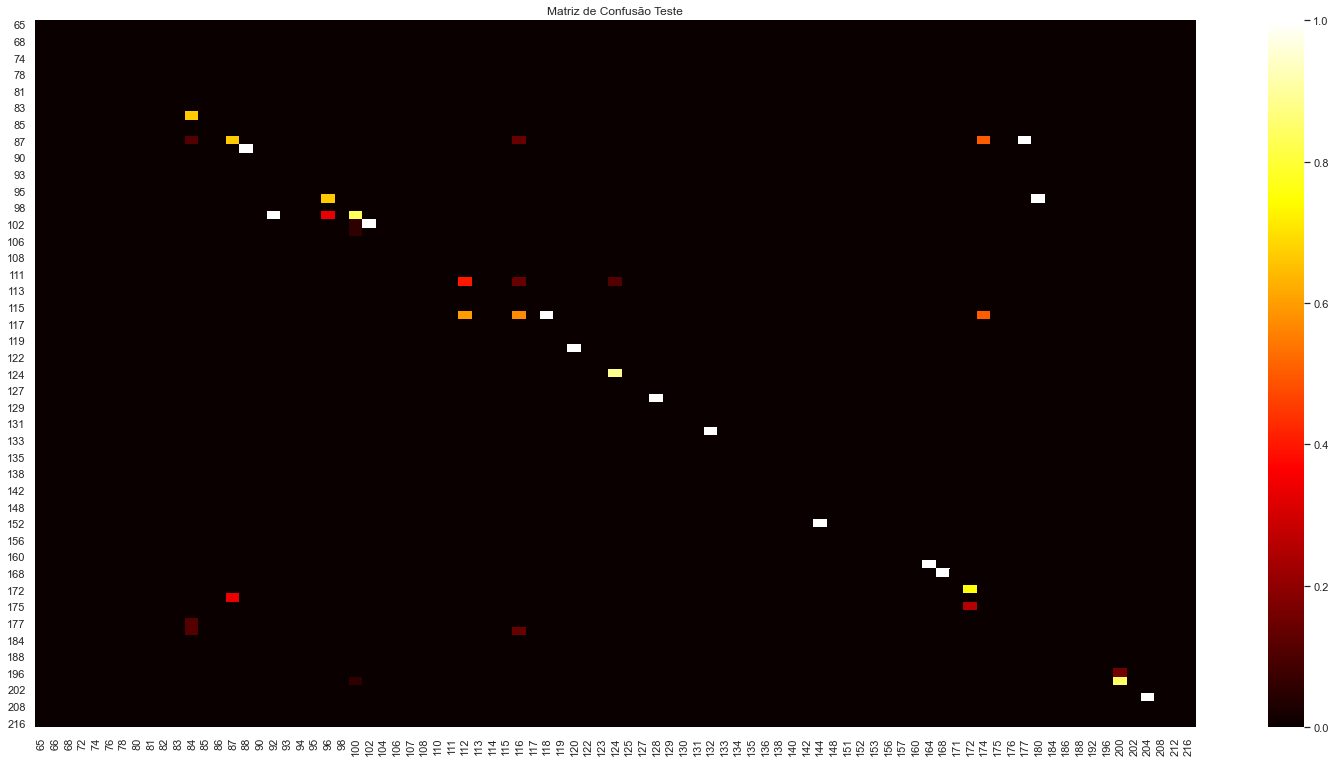

In [15]:
#Tamanho da Figura
plt.rcParams['figure.figsize'] = (26,13)
ClassesIndex = Classes_sort.reshape(85) #1-D vector

#Treino
cm=metrics.confusion_matrix(Y_train.argmax(axis=1),y_predtrain.argmax(axis=1),normalize='pred',labels=range(Y_train.shape[1]))
df_cm = pd.DataFrame(cm, index = ClassesIndex, columns = ClassesIndex)
sn.set(font_scale=1) # for label size
#sn.heatmap(df_cm,linewidths=.5,cmap='hot',annot=True, annot_kws={"size": 16}) # Para fig size = 110,70
plt.title('Matriz de Confusão Treino')
sn.heatmap(df_cm,cmap='hot')
plt.show()

#Validação
cm=metrics.confusion_matrix(Y_val.argmax(axis=1),y_predval.argmax(axis=1),normalize='pred',labels=range(Y_val.shape[1]))
df_cm = pd.DataFrame(cm, index = ClassesIndex, columns = ClassesIndex)
sn.set(font_scale=1)
plt.title('Matriz de Confusão Validação')
sn.heatmap(df_cm,cmap='hot')
plt.show()

#Teste
cm=metrics.confusion_matrix(Y_test.argmax(axis=1),y_predtest.argmax(axis=1),normalize='pred',labels=range(Y_test.shape[1]))
df_cm = pd.DataFrame(cm, index = ClassesIndex, columns = ClassesIndex)
sn.set(font_scale=1)
plt.title('Matriz de Confusão Teste')
sn.heatmap(df_cm,cmap='hot')
plt.show()

In [16]:
b=0
for i in range(0,len(Y_val)):
    cm = confusion_matrix(Y_val[i], y_predval[i])
    if (cm[0][0]==84):
        b=b+1
a=0
for i in range(0,len(Y_train)):
    cm = confusion_matrix(Y_train[i], y_predtrain[i])
    if (cm[0][0]==84):
        a=a+1
c=0
for i in range(0,len(Y_test)):
    cm = confusion_matrix(Y_test[i], y_predtest[i])
    if (cm[0][0]==84):
        c=c+1

print(f"O conjunto de treinamento acertou {a} músicas das {len(Y_train)} do database")
print(f"O conjunto de validação acertou {b} músicas das {len(Y_val)} do database")
print(f"O conjunto de teste acertou acertou {c} músicas das {len(Y_test)} do database")

O conjunto de treinamento acertou 3580 músicas das 3653 do database
O conjunto de validação acertou 324 músicas das 427 do database
O conjunto de teste acertou acertou 74 músicas das 100 do database


In [17]:
print(f"O conjunto de treinamento tem {round(a*100/(len(Y_train)),2)}% de acerto.")
print(f"O conjunto de validação tem {round(b*100/(len(Y_val)),2)}% de acerto.")
print(f"O conjunto de teste tem {c*100/(len(Y_test))}% de acerto.")

O conjunto de treinamento tem 98.0% de acerto.
O conjunto de validação tem 75.88% de acerto.
O conjunto de teste tem 74.0% de acerto.


In [18]:
#Métrica 4% 
#Y_val[1], y_predval[1]

#---------Vetor Métrica------------#
metrica = [] #cada par de valor é uma métrica
for i in Classes_sort.T:
    a = i*0.04
    metrica.append(i-a)
    metrica.append(i+a)
    
#print(metrica)
#Metrica[0] == -4%
#Metrica[1] == +4%

#---------One hot to Linear------------#

#===TRAIN===#
Y_train_ = []
Y_predtrain_ = []
Y_train_mtr1 = []
Y_predtrain_mtr1 = []

for cont in range(0,Y_train.shape[0]):
    a = 0
    i = 0
    i_pred = 0
    for a in range(0,Y_train.shape[1]):
        i = Y_train[cont][a]
        i_pred = y_predtrain[cont][a]
        if (i==1):
            Y_train_.append(a)
        if (i_pred==1):
            Y_predtrain_.append(a)
        a += 1
for i in range(0,Y_train.shape[0]):
    Y_train_mtr1.append(Classes_sort.T[0][Y_train_[i]])
    Y_predtrain_mtr1.append(Classes_sort.T[0][Y_predtrain_[i]])


#===VAL===#
Y_val_ = []
Y_predval_ = []
Y_val_mtr1 = []
Y_predval_mtr1 = []

for cont in range(0,Y_val.shape[0]):
    a = 0
    i = 0
    i_pred = 0
    for a in range(0,Y_val.shape[1]):
        i = Y_val[cont][a]
        i_pred = y_predval[cont][a]
        if (i==1):
            Y_val_.append(a)
        if (i_pred==1):
            Y_predval_.append(a)
        a += 1
for i in range(0,Y_val.shape[0]):
    Y_val_mtr1.append(Classes_sort.T[0][Y_val_[i]])
    Y_predval_mtr1.append(Classes_sort.T[0][Y_predval_[i]])


#===TEST===#
Y_test_ = []
Y_predtest_ = []
Y_test_mtr1 = []
Y_predtest_mtr1 = []

for cont in range(0,Y_test.shape[0]):
    a = 0
    i = 0
    i_pred = 0
    for a in range(0,Y_test.shape[1]):
        i = Y_test[cont][a]
        i_pred = y_predtest[cont][a]
        if (i==1):
            Y_test_.append(a)
        if (i_pred==1):
            Y_predtest_.append(a)
        a += 1
for i in range(0,Y_test.shape[0]):
    Y_test_mtr1.append(Classes_sort.T[0][Y_test_[i]])
    Y_predtest_mtr1.append(Classes_sort.T[0][Y_predtest_[i]])
    

#print(len(Y_train_))
#print(len(Y_predtrain_))
#print(len(Y_train_mtr1))
#print(len(Y_predtrain_mtr1))
#print(len(Y_val_))
#print(len(Y_predval_))
#print(len(Y_val_mtr1))
#print(len(Y_predval_mtr1))
#print(len(Y_test_))
#print(len(Y_predtest_))
#print(len(Y_test_mtr1))
#print(len(Y_predtest_mtr1))

In [19]:
a = 0
for i in range(0,Y_train.shape[0]):
    if (Y_predtrain_mtr1[i]>=Y_train_mtr1[i]-0.04*Y_train_mtr1[i] and Y_predtrain_mtr1[i]<=Y_train_mtr1[i]+0.04*Y_train_mtr1[i]):
        a = a + 1
b = 0
for i in range(0,Y_val.shape[0]):
    if (Y_predval_mtr1[i]>=Y_val_mtr1[i]-0.04*Y_val_mtr1[i] and Y_predval_mtr1[i]<=Y_val_mtr1[i]+0.04*Y_val_mtr1[i]):
        b = b + 1
c = 0
for i in range(0,Y_test.shape[0]):
    if (Y_predtest_mtr1[i]>=Y_test_mtr1[i]-0.04*Y_test_mtr1[i] and Y_predtest_mtr1[i]<=Y_test_mtr1[i]+0.04*Y_test_mtr1[i]):
        c = c + 1

print(f"O conjunto de treinamento tem {round(a*100/(len(Y_train)),2)}% de acerto com a Métrica 1.")
print(f"O conjunto de validação tem {round(b*100/(len(Y_val)),2)}% de acerto com a Métrica 1.")
print(f"O conjunto de teste tem {c*100/(len(Y_test))}% de acerto com a Métrica 1.")


O conjunto de treinamento tem 99.62% de acerto com a Métrica 1.
O conjunto de validação tem 91.8% de acerto com a Métrica 1.
O conjunto de teste tem 92.0% de acerto com a Métrica 1.
